1. Design model (input, output, size, forward pass)
2. Construct loss and optimizer
3. Training loop
   * forward pass: compute prediction
   * backward pass: gradients
   * update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samepls, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epoches =  100
for epoch in range(num_epoches):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch +1) % 10 == 0:
        print(f"epoch: {epoch +1}, loss = {loss.item():.4f}")

epoch: 10, loss = 4400.3228
epoch: 20, loss = 3284.2007
epoch: 30, loss = 2476.1504
epoch: 40, loss = 1890.5391
epoch: 50, loss = 1465.7312
epoch: 60, loss = 1157.3022
epoch: 70, loss = 933.1885
epoch: 80, loss = 770.2201
epoch: 90, loss = 651.6334
epoch: 100, loss = 565.2879


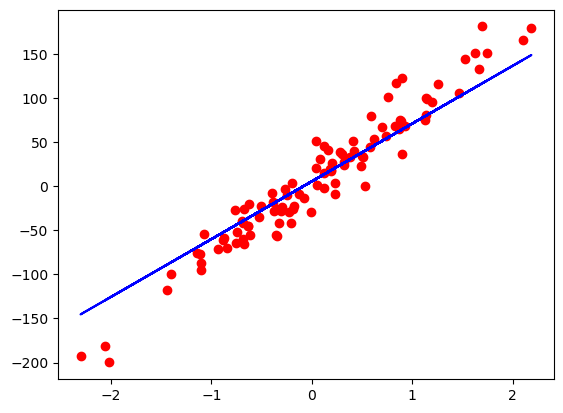

In [3]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X, y, 'ro')
plt.plot(X, predicted, 'b')
plt.show()